<a href="https://colab.research.google.com/github/ark610475/DM2024-Lab1-Master/blob/main/Lab1p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Student Information**

**Name:** 張仲濡

**Student ID:**  113062572

**GitHub ID:**

In [1]:
!pip3 install pami
!pip3 install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 9.2 MB/s eta 0:00:00
  Created wheel for JsonForm: filename=JsonForm-0.0.2-py3-none-any.whl size=3311 sha256=6cc306fe4cbc2b427b7de5b61507aa8591f611d7da654cbf585d029328a72138
  Stored in directory: /root/.cache/pip/wheels/b6/e5/87/11026246d3bd4ad67c0615682d2d6748bbd9a40ac0490882bd
  Created wheel for JsonSir: fi

In [3]:
import pandas as pd
import numpy as np
import nltk
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import PAMI
import umap
%matplotlib inline

In [4]:
!git clone https://github.com/ark610475/DM2024-Lab1-Master.git

Cloning into 'DM2024-Lab1-Master'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 146 (delta 47), reused 18 (delta 18), pack-reused 77 (from 1)
Receiving objects: 100% (146/146), 19.52 MiB | 24.55 MiB/s, done.
Resolving deltas: 100% (67/67), done.


In [5]:
ytc = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [69]:
len(ytc)

1500

In [5]:
ytc.head()

,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
4,nostalgia,listening to his songs reminds me of my mum wh...


In [6]:
for i in range(len(ytc)) :
  if ytc.loc[i,"sentiment"] == "not nostalgia" :
    ytc.loc[i,"sentiment_num"] = 0
  else :
    ytc.loc[i,"sentiment_num"] = 1

ytc['sentiment_num'] = ytc['sentiment_num'].astype(int)

In [7]:
ytc.head()

,sentiment,comment,sentiment_num
0,not nostalgia,He was a singer with a golden voice that I lov...,0
1,nostalgia,The mist beautiful voice ever I listened to hi...,1
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,1
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,0
4,nostalgia,listening to his songs reminds me of my mum wh...,1


In [8]:
import sys
sys.path.append('/content/DM2024-Lab1-Master')

import helpers.data_mining_helpers as dmh

In [9]:
ytc.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment,sentiment_num
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [7]:
sum(ytc.duplicated())

1

In [10]:
duplicate_rows = ytc[ytc.duplicated(keep=False)]
print(duplicate_rows)

        sentiment                                            comment  \
62  not nostalgia  never heard this song before... WOW What an am...   
78  not nostalgia  never heard this song before... WOW What an am...   

    sentiment_num  
62              0  
78              0  


In [8]:
ytc.drop_duplicates(keep=False, inplace=True)

In [9]:
len(ytc)

1498

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

sentiment
nostalgia        750
not nostalgia    748
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment distribution'}, xlabel='sentiment'>

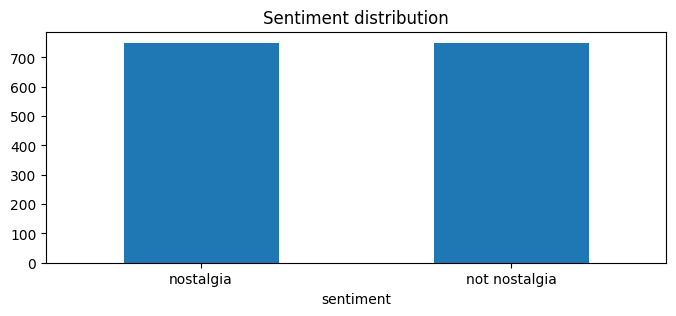

In [34]:
print(ytc.sentiment.value_counts())

ytc.sentiment.value_counts().plot(kind = "bar", title = "Sentiment distribution", rot = 0, figsize = (8,3)) # comments amount comparsion

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
ytc_count = count_vectorizer.fit_transform(ytc['comment'])

In [35]:
term_frequencies = []
for j in range(0,ytc_count.shape[1]):
    term_frequencies.append(sum(ytc_count[:,j].toarray()))

In [37]:
term_frequencies = np.asarray(ytc_count.sum(axis=0))[0]

In [39]:
df = pd.DataFrame({
    'term': count_vectorizer.get_feature_names_out(),
    'frequency': term_frequencies
})

Hfreq_terms = df.nlargest(50,"frequency")

fig = px.bar(Hfreq_terms, x='term', y='frequency')
fig.update_xaxes(tickangle=90)
fig.show()   # frequency (in all comments)

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer


array(['all', 'and', 'as', 'at', 'back', 'be', 'beautiful', 'but', 'can',
       'for', 'from', 'good', 'great', 'have', 'he', 'her', 'in', 'is',
       'it', 'just', 'like', 'love', 'me', 'memories', 'music', 'my',
       'not', 'now', 'of', 'old', 'on', 'one', 'remember', 'she', 'so',
       'song', 'songs', 'that', 'the', 'this', 'time', 'to', 'voice',
       'was', 'we', 'what', 'when', 'with', 'years', 'you'], dtype=object)

In [40]:
import seaborn as sns

In [21]:
ytc_nos = ytc[ytc["sentiment_num"]==1]
len(ytc_nos)

750

In [28]:
ytc_nnos = ytc[ytc["sentiment_num"]==0]
len(ytc_nnos)

748

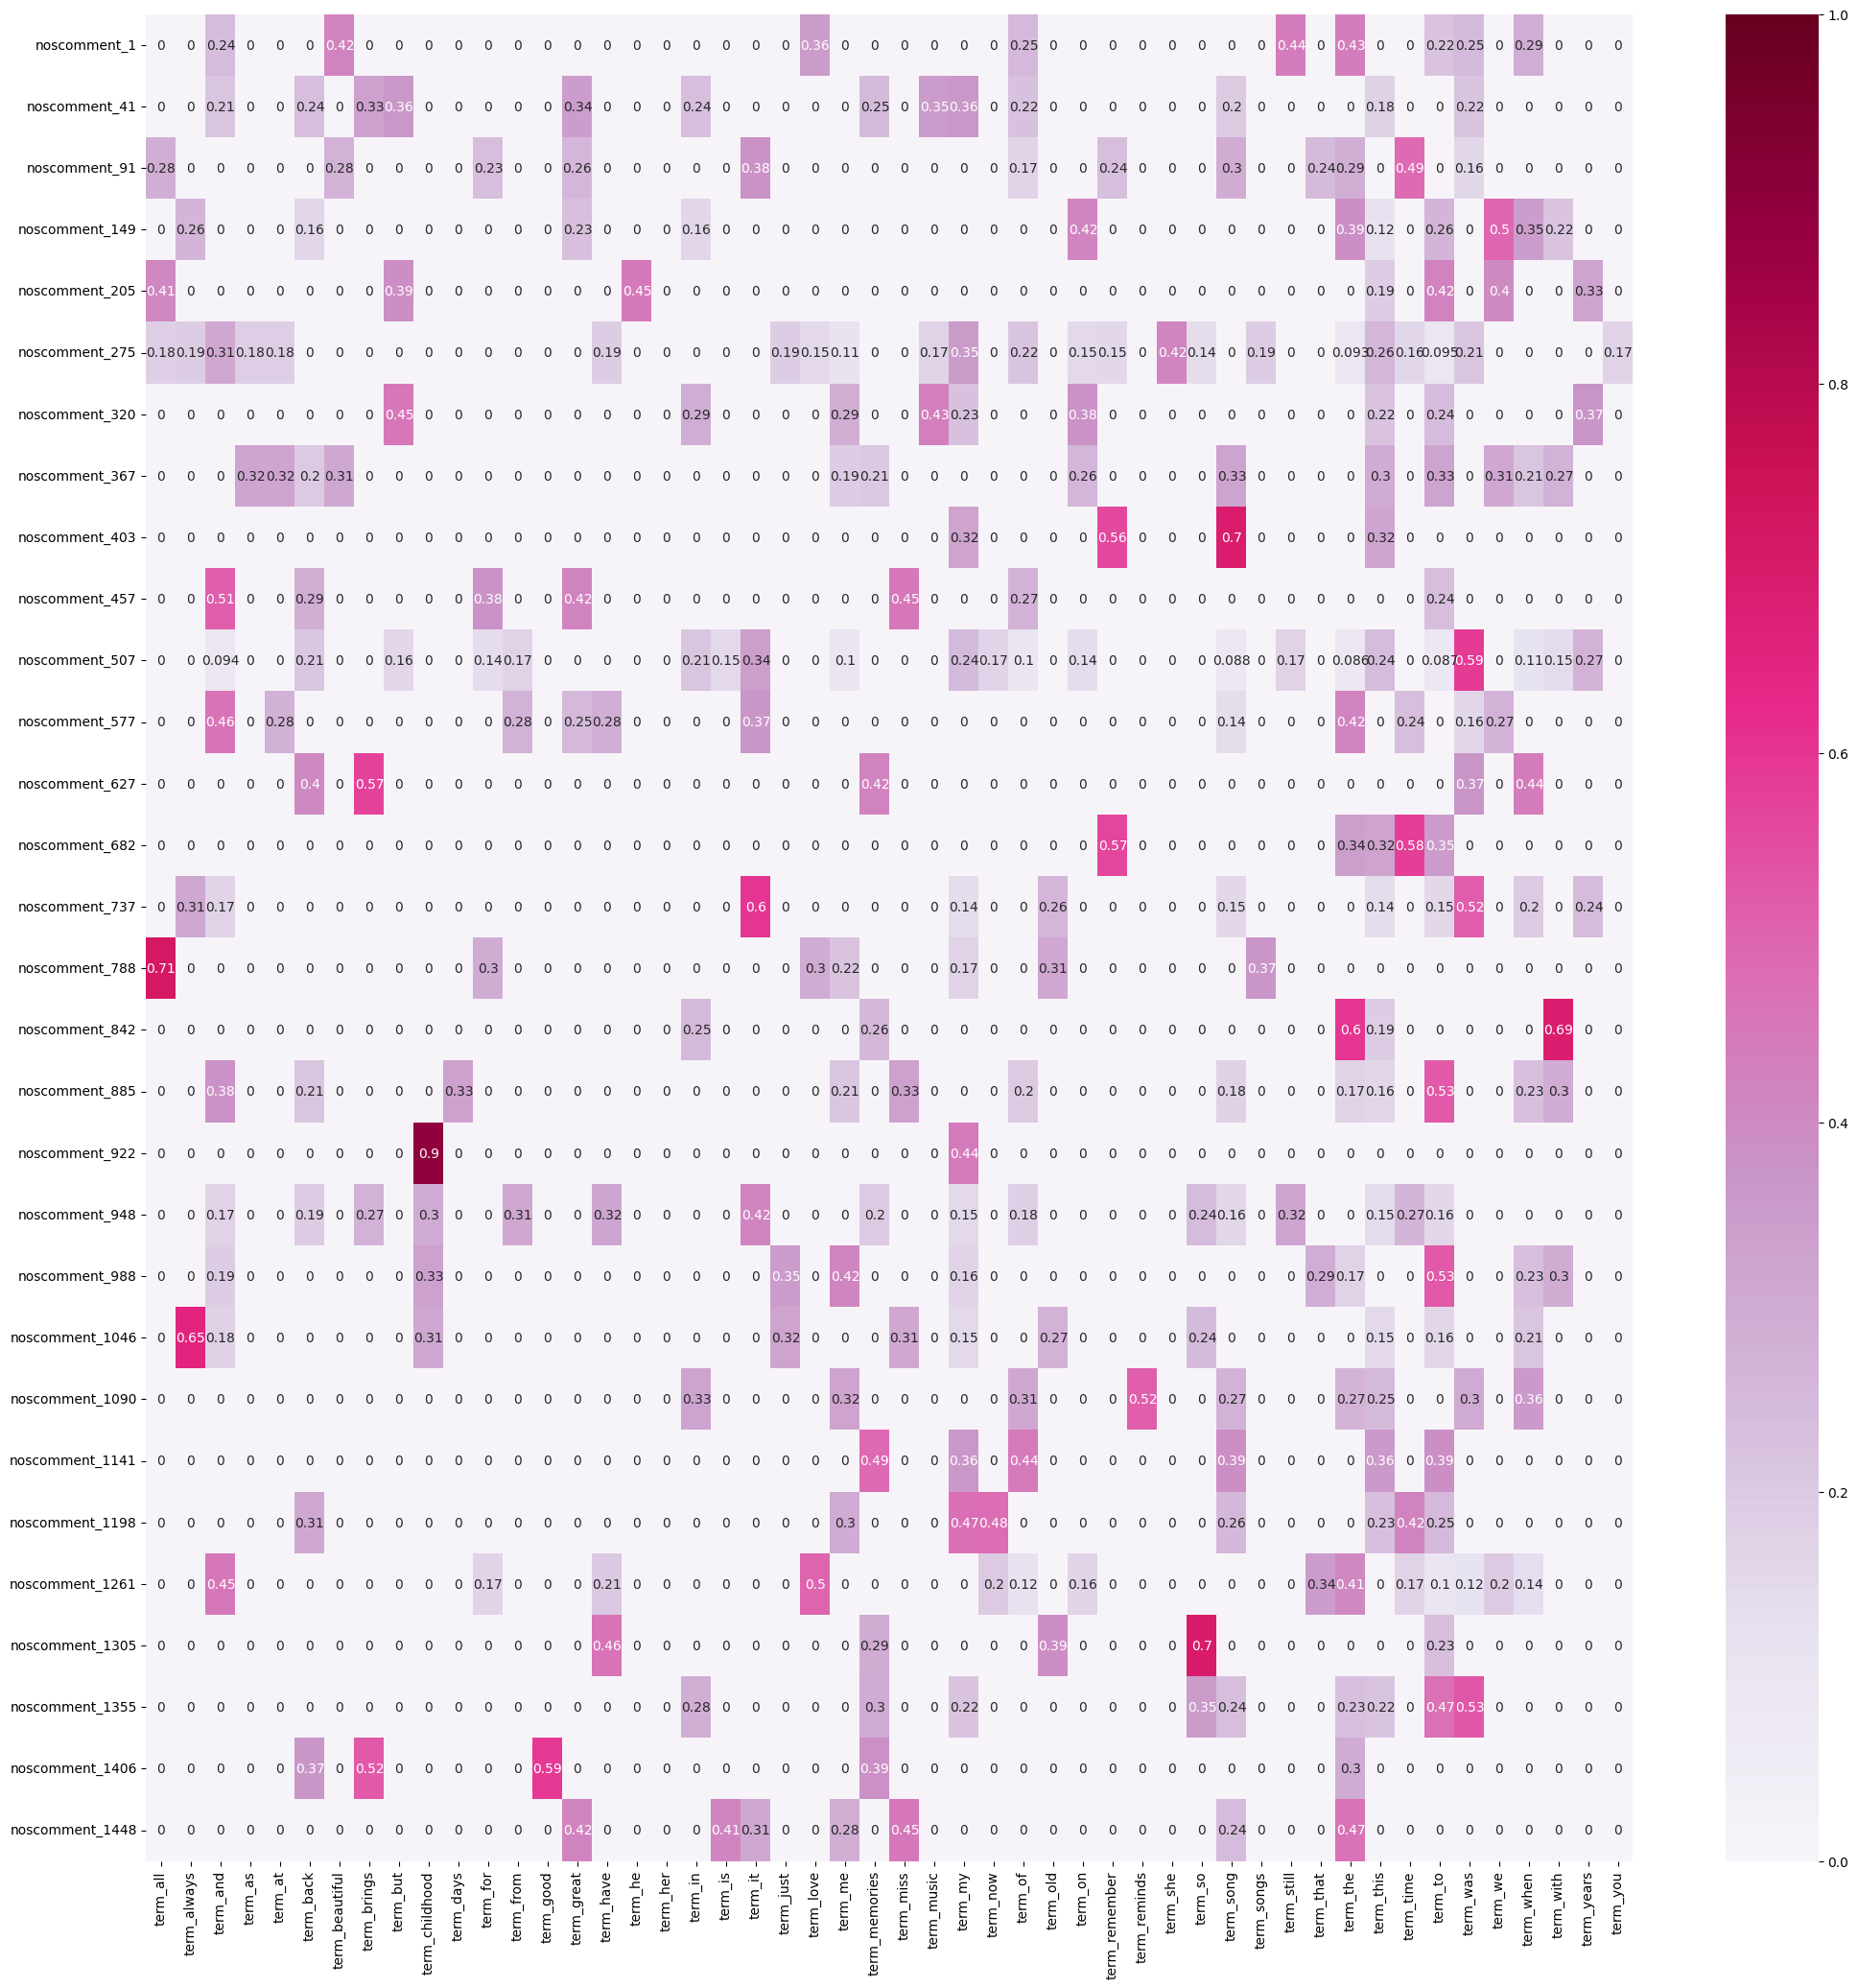

In [32]:
vectorizer = TfidfVectorizer(max_features=50)
nos_matrix = vectorizer.fit_transform(ytc_nos.comment)

plot_x = ["term_"+str(i) for i in vectorizer.get_feature_names_out()[:50]]
plot_y = ["noscomment_"+ str(i) for i in list(ytc_nos.index)[:750:25]]
plot_z = nos_matrix[:750:25,:50].toarray()

nos_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(25,25))
ax = sns.heatmap(nos_todraw,cmap="PuRd",vmin=0, vmax=1, annot=True)  # heat map for TD-IDF of the nostalgia comments


In [18]:
nos_matrix = vectorizer.fit_transform(ytc_nos.comment)
max_nos_val = []
max_nos_word = []
for i in range(len(ytc_nos)):
  tfidf_values = nos_matrix[i].toarray().flatten()
  max_nos_val.append(tfidf_values.max())
  max_index = tfidf_values.argmax()
  max_nos_word.append(vectorizer.get_feature_names_out()[max_index])


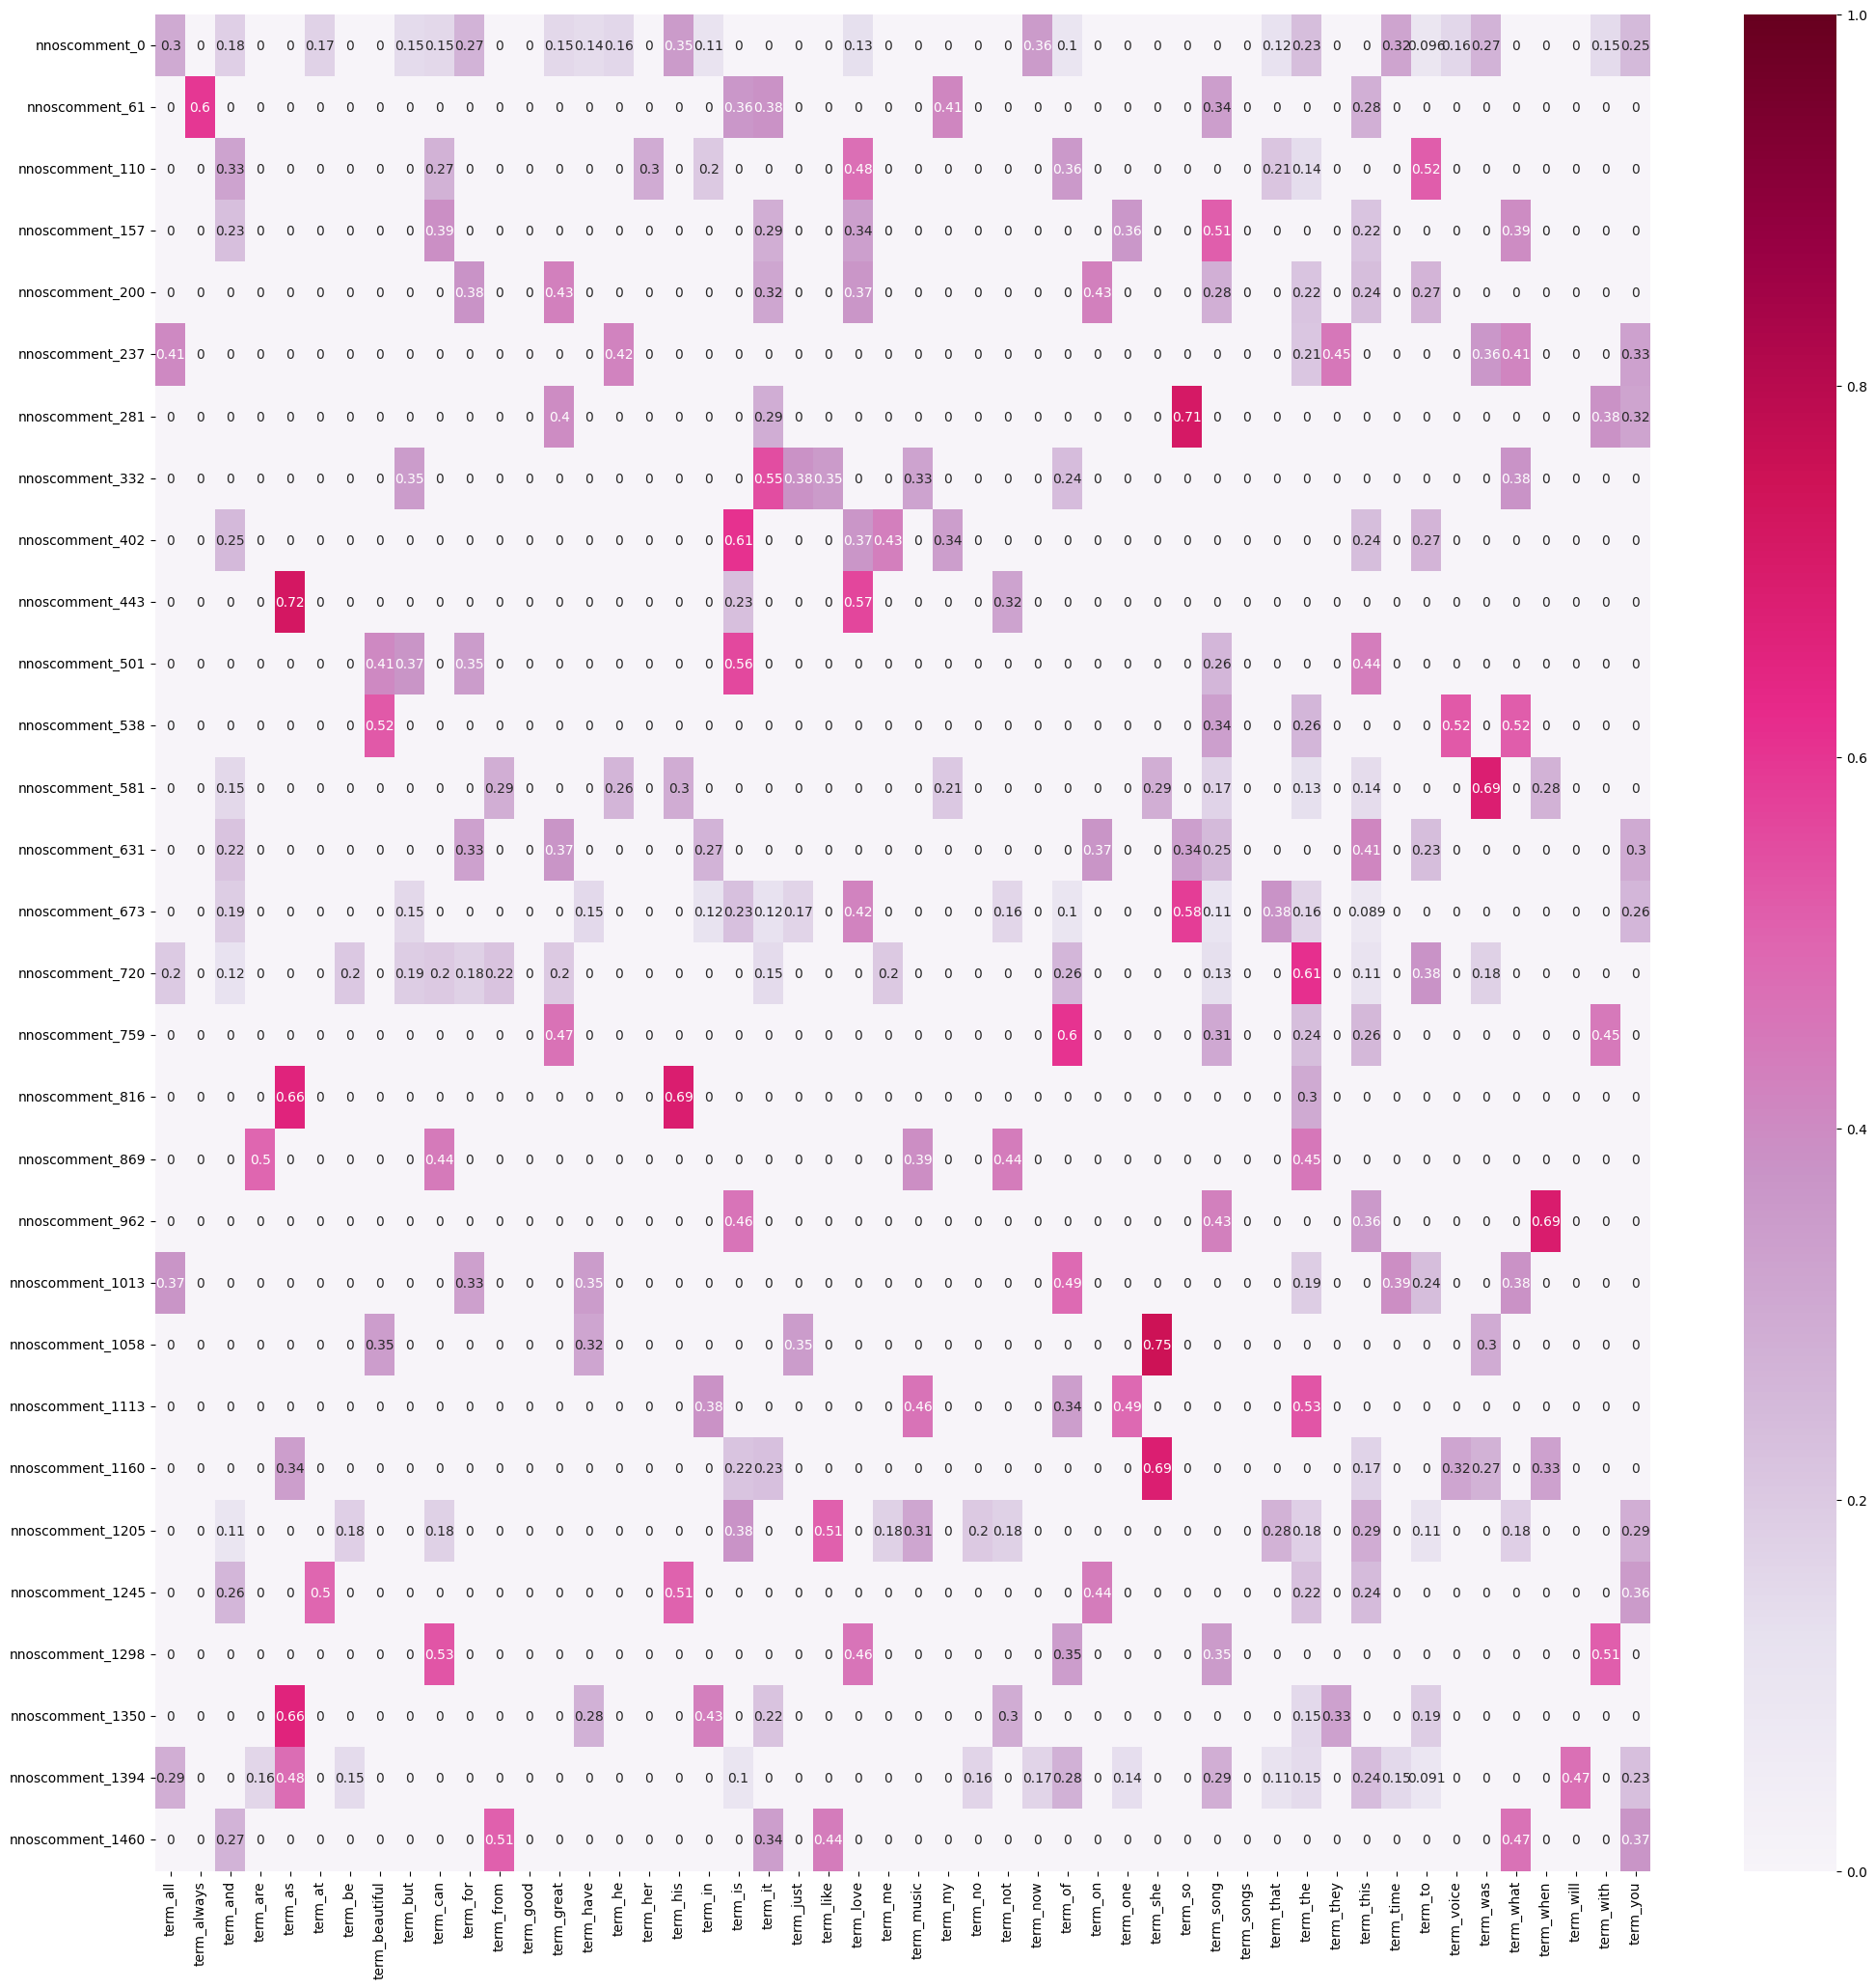

In [33]:
vectorizer = TfidfVectorizer(max_features=50)
nnos_matrix = vectorizer.fit_transform(ytc_nnos.comment)

plot_x = ["term_"+str(i) for i in vectorizer.get_feature_names_out()[:50]]
plot_y = ["nnoscomment_"+ str(i) for i in list(ytc_nnos.index)[:748:25]]
plot_z = nnos_matrix[:748:25,:50].toarray()

nnos_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(25,25))
ax = sns.heatmap(nnos_todraw,cmap="PuRd",vmin=0, vmax=1, annot=True)  # heat map for TD-IDF of the Not nostalgia comments

In [19]:
import plotly.express as px

df = pd.DataFrame({
    'term': max_nos_word,
    'TF-IDF_val': max_nos_val
})

fig = px.bar(df,title="Nostalgia high TD-IDF",x='term', y='TF-IDF_val')
fig.update_xaxes(tickangle=90)

fig.show()

In [21]:
vectorizer = TfidfVectorizer(max_features=50)
nnos_matrix = vectorizer.fit_transform(ytc_nnos.comment)
max_nnos_val = []
max_nnos_word = []
for i in range(len(ytc_nnos)):
  tfidf_values = nnos_matrix[i].toarray().flatten()
  max_nnos_val.append(tfidf_values.max())
  max_index = tfidf_values.argmax()
  max_nnos_word.append(vectorizer.get_feature_names_out()[max_index])

In [22]:
df = pd.DataFrame({
    'term': max_nnos_word[:300],
    'TF-IDF_val': max_nnos_val[:300]
})

fig = px.bar(df,title="Not nostalgia high TD-IDF",x='term', y='TF-IDF_val')
fig.update_xaxes(tickangle=90)

fig.show()

In [49]:
vectorizer = TfidfVectorizer()
ytc_tfidf = vectorizer.fit_transform(ytc.comment)
vectorizer.get_feature_names_out()

array(['00', '000', '045', ..., 'yup', 'zealand', 'zulus'], dtype=object)

In [52]:
nosvectorizer = TfidfVectorizer()
nos_matrix = nosvectorizer.fit_transform(ytc_nos.comment)
nnosvectorizer = TfidfVectorizer()
nnos_matrix = nnosvectorizer.fit_transform(ytc_nnos.comment)

In [53]:
nos_df = pd.DataFrame(nos_matrix.toarray(),columns = nosvectorizer.get_feature_names_out())
nnos_df = pd.DataFrame(nnos_matrix.toarray(),columns = nnosvectorizer.get_feature_names_out())

In [55]:
word_counts = nos_df.sum(axis=0).to_numpy()
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [nos_df.iloc[:, i].name for i in top_5_percent_indices]

print("Category: Nostalgia")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: Nostalgia
Number of terms in top 5%: 114
Filtered terms: ['the', 'my', 'this', 'to', 'song', 'and', 'was', 'of', 'back', 'me', 'memories', 'it', 'in', 'when', 'so', 'love', 'brings', 'years', 'time', 'you', 'remember', 'childhood', 'for', 'that', 'old', 'beautiful', 'great', 'reminds', 'on', 'days', 'music', 'good', 'is', 'miss', 'with', 'all', 'many', 'dad', 'songs', 'always', 'from', 'we', 'as', 'but', 'now', 'listening', 'much', 'at', 'still', 'first', 'her', 'just', 'times', 'young', 'those', 'school', 'loved', 'he', 'very', 'thank', 'best', 'had', 'happy', 'she', 'used', 'his', 'have', 'up', 'these', 'listen', 'am', 'every', 'like', 'takes', 'were', 'what', 'voice', 'him', 'one', 'thanks', 'they', 'played', 'heard', 'hear', 'bring', 'can', 'sing', 'mom', 'never', 'be', 'how', 'life', 'again', 'ago', 'really', 'some', 'nostalgic', 'then', 'kid', 'are', 'wish', 'makes', 'play', 'not', 'mum', 'favorite', 'day', 'radio', 'go', 'out', 'wonderful', 'memory', 'little', 'singing

In [56]:
ord_counts = nnos_df.sum(axis=0).to_numpy()
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [nnos_df.iloc[:, i].name for i in top_5_percent_indices]

print("Category: Not Nostalgia")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: Not Nostalgia
Number of terms in top 5%: 114
Filtered terms: ['shared', 'machine', 'shots', 'sincerely', 'reminds', 'april', 'strickly', 'melt', 'baritone', 'lee', 'levis', 'henderson', 'hates', 'super', 'relationships', 'jr', 'briefly', 'that', 'simmons', 'they', 'parts', 'cigarette', 'excuse', 'shape', 'men', 'beings', 'fresh', 'pavillion', 'message', 'curios', 'lowest', 'floaty', 'height', 'lived', 'talking', 'anything', 'lane', 'crap', 'reminiscing', 'appear', 'failing', 'stumble', 'auto', 'btw', 'measure', 'introduction', 'lover', 'awakened', 'rock', 'europe', 'granddaughter', 'hope', 'simplistic', 'thing', 'shoulder', 'predicting', 'judging', 'god', 'standard', 'shady', 'bizarre', 'gen', 'girls', 'puts', 'special', 'greats', 'glitter', 'soundtracks', 'ship', 'intoxicating', 'appearances', 'drums', 'interested', 'seeing', 'suggestive', 'sun', 'stealing', 'great', 'met', 'shame', 'ships', 'naturally', 'gone', 'golden', 'brenda', 'by', 'rebellious', 'lock', 'march', 'befor

In [59]:
word_counts = nos_df.sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [nos_df.iloc[:, i].name for i in bottom_1_percent_indices]

print("Category: Nostalgia")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: Nostalgia
Number of terms in bottom 1%: 22
Filtered terms: ['identical', 'touch', 'angels', 'fighter', 'flight', 'eagle', 'large', 'routine', 'flying', 'jet', 'depending', 'acknowledge', 'hooked', 'gf', 'macias', 'hadn', 'mothers', 'anita', 'anna', '3rd', 'whether', 'grocery']


In [60]:
word_counts = nnos_df.sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [nnos_df.iloc[:, i].name for i in bottom_1_percent_indices]

print("Category: Not Nostalgia")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: Not Nostalgia
Number of terms in bottom 1%: 26
Filtered terms: ['excited', 'wondering', 'whispering', 'familiar', 'vice', 'versa', 'following', 'ears', 'minds', 'miles', '67', 'basic', 'conclusion', 'points', 'profane', 'non', 'illicit', 'realise', 'bold', 'existent', 'historic', 'alternative', 'explicit', 'fossils', '40s', 'kissing']


In [26]:
vectorizer = TfidfVectorizer()
ytc_tfidf = vectorizer.fit_transform(ytc.comment)

In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(ytc_tfidf, ytc['sentiment'], test_size=0.2)

nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train, y_train)
y_pred_tfidf = nb_tfidf.predict(X_test)

print(classification_report(y_test, y_pred_tfidf))

               precision    recall  f1-score   support

    nostalgia       0.84      0.95      0.89       155
not nostalgia       0.94      0.81      0.87       145

     accuracy                           0.88       300
    macro avg       0.89      0.88      0.88       300
 weighted avg       0.89      0.88      0.88       300



In [25]:
from sklearn.naive_bayes import BernoulliNB

X_train, X_test, y_train, y_test = train_test_split(ytc_count, ytc['sentiment'], test_size=0.2)

nb_count = BernoulliNB()
nb_count.fit(X_train, y_train)
y_pred_count = nb_count.predict(X_test)

print(classification_report(y_test, y_pred_count))

               precision    recall  f1-score   support

    nostalgia       0.86      0.96      0.91       159
not nostalgia       0.94      0.83      0.88       141

     accuracy                           0.90       300
    macro avg       0.90      0.89      0.90       300
 weighted avg       0.90      0.90      0.90       300

